In [74]:
from torch.optim.lr_scheduler import OneCycleLR, ReduceLROnPlateau, CosineAnnealingWarmRestarts,SequentialLR, ExponentialLR
from torch.optim.radam import RAdam
import torch
import torch.nn as nn

In [49]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(10, 20)
        self.fc2 = nn.Linear(20, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [94]:
num_epochs = 5000
T_0 = 5000
T_mult = 1
model = SimpleNN()
optimizer = RAdam(model.parameters(), lr=5e-6)
lr_hist = []
# scheduler1 = CosineAnnealingWarmRestarts(optimizer, T_0, T_mult)
# scheduler2 = CosineAnnealingWarmRestarts(optimizer, 3*T_0, T_mult)
scheduler1 = ExponentialLR(optimizer, gamma=0.999)
scheduler2 = ExponentialLR(optimizer, gamma=0.998)
# scheduler1 = OneCycleLR(optimizer, max_lr=1e-3)

chained_scheduler = SequentialLR(optimizer, schedulers=[scheduler1, scheduler2, scheduler1], milestones=[2500, 4000], verbose=True)
for epoch in range((num_epochs)):
    optimizer.step()
    lr_hist.append(chained_scheduler.get_last_lr())
    chained_scheduler.step()

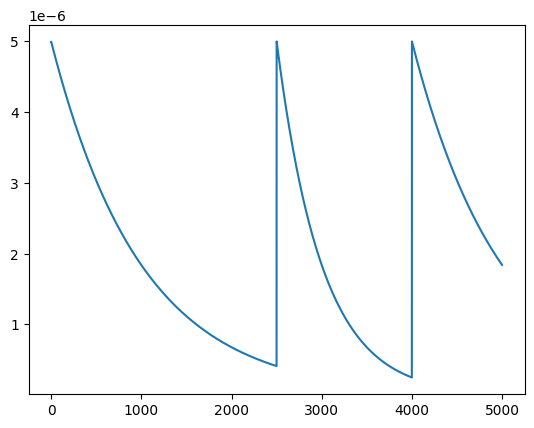

In [95]:
import matplotlib.pyplot as plt

plt.plot(lr_hist)
# plt.xlim(0,5000)

ImportError: cannot import name 'create_model' from 'lib.models' (unknown location)